# Exploration Notebook

In [1]:
import pandas as pd
import numpy as np
import acquire
import prepare
import explore
import evaluate

#Sklearn Tools and Modules
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Acquire the data
df = acquire.get_broadway_data()
df.head(1)

,show_id,Show Title,Year,Previews Date,Opening Date,Closing Date,Theatre Name,Production Type,Show Type,Show Type (Simple),...,N Creative Team,theatre_id,Theatre Full Address,Theatre Street Address,Theatre Address Locality,Theatre Address Region,Theatre Postal Code,Theatre Year Closed,Theatre Year Demolished,Theatre Capacity
0,322333,King Richard III,1750,NaN,1750-03-05,1750-03-12,Nassau Street Theatre,Original Production,Play,Play,...,1,5640.0,64-6 Nassau Street New York NY,64-6 Nassau Street,New York,NY,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11053 entries, 0 to 11052
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   show_id                   11053 non-null  int64  
 1   Show Title                11053 non-null  object 
 2   Year                      11053 non-null  int64  
 3   Previews Date             419 non-null    object 
 4   Opening Date              10996 non-null  object 
 5   Closing Date              5255 non-null   object 
 6   Theatre Name              10965 non-null  object 
 7   Production Type           11053 non-null  object 
 8   Show Type                 11053 non-null  object 
 9   Show Type (Simple)        11053 non-null  object 
 10  Intermissions             2409 non-null   float64
 11  N Performances            8835 non-null   float64
 12  Run Time                  2 non-null      float64
 13  Show Not Opened           11053 non-null  bool   
 14  Reviva

In [4]:
#Prepare the Data
df = prepare.prep_bway(df)

In [5]:
df.shape

(4549, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4549 entries, 322308 to 333480
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 4549 non-null   int64  
 1   N People                             4549 non-null   int64  
 2   N Performers                         4549 non-null   int64  
 3   N Creative Team                      4549 non-null   int64  
 4   theatre_id                           4549 non-null   float64
 5   Theatre Capacity                     4549 non-null   float64
 6   length_of_run                        4549 non-null   int64  
 7   is_revival                           4549 non-null   uint8  
 8   Production Type_Concert              4549 non-null   uint8  
 9   Production Type_Original Production  4549 non-null   uint8  
 10  Production Type_Premiere             4549 non-null   uint8  
 11  Production Type_Product

**Data Exploration**

In [7]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Year', 'N People', 'N Performers', 'N Creative Team', 'theatre_id',
       'Theatre Capacity', 'length_of_run', 'is_revival',
       'Production Type_Concert', 'Production Type_Original Production',
       'Production Type_Premiere', 'Production Type_Production',
       'Production Type_Revised Production', 'Production Type_Revival',
       'Show Type_Ballet', 'Show Type_Dance', 'Show Type_Musical',
       'Show Type_One-Acts', 'Show Type_Opera Bouffe', 'Show Type_Operetta',
       'Show Type_Other', 'Show Type_Performance', 'Show Type_Play',
       'Show Type_Play with Music', 'Show Type_Solo', 'Show Type_Vaudeville'],
      dtype='object')>

In [8]:
cat_vars = ['is_revival', 'Production Type_Concert',
       'Production Type_Original Production', 'Production Type_Premiere',
       'Production Type_Production', 'Production Type_Revised Production',
       'Production Type_Revival', 'Show Type_Ballet', 'Show Type_Dance',
       'Show Type_Musical', 'Show Type_One-Acts', 'Show Type_Opera Bouffe',
       'Show Type_Operetta', 'Show Type_Other', 'Show Type_Performance',
       'Show Type_Play', 'Show Type_Play with Music', 'Show Type_Solo',
       'Show Type_Vaudeville']

quant_vars = ['Year','N People', 'N Performers',
       'N Creative Team', 'theatre_id', 'Theatre Capacity', 'length_of_run']

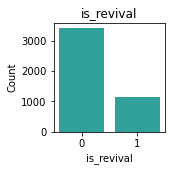

   is_revival  Count  Percent
0           0   3404    74.83
1           1   1145    25.17
_________________________________________________________________


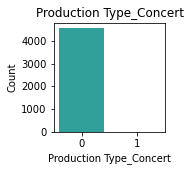

   Production Type_Concert  Count  Percent
0                        0   4547    99.96
1                        1      2     0.04
_________________________________________________________________


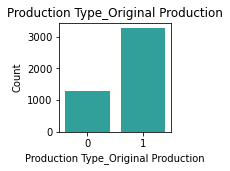

   Production Type_Original Production  Count  Percent
1                                    1   3266     71.8
0                                    0   1283     28.2
_________________________________________________________________


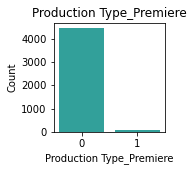

   Production Type_Premiere  Count  Percent
0                         0   4451    97.85
1                         1     98     2.15
_________________________________________________________________


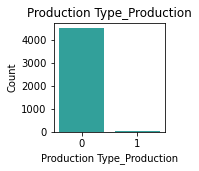

   Production Type_Production  Count  Percent
0                           0   4515    99.25
1                           1     34     0.75
_________________________________________________________________


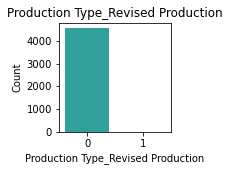

   Production Type_Revised Production  Count  Percent
0                                   0   4545    99.91
1                                   1      4     0.09
_________________________________________________________________


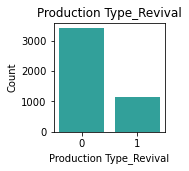

   Production Type_Revival  Count  Percent
0                        0   3404    74.83
1                        1   1145    25.17
_________________________________________________________________


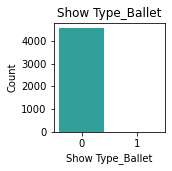

   Show Type_Ballet  Count  Percent
0                 0   4548    99.98
1                 1      1     0.02
_________________________________________________________________


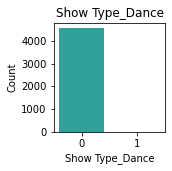

   Show Type_Dance  Count  Percent
0                0   4542    99.85
1                1      7     0.15
_________________________________________________________________


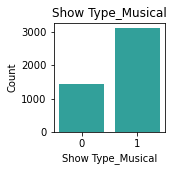

   Show Type_Musical  Count  Percent
0                  1   3106    68.28
1                  0   1443    31.72
_________________________________________________________________


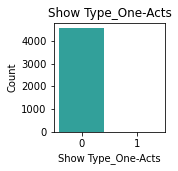

   Show Type_One-Acts  Count  Percent
0                   0   4548    99.98
1                   1      1     0.02
_________________________________________________________________


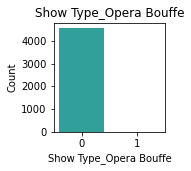

   Show Type_Opera Bouffe  Count  Percent
0                       0   4548    99.98
1                       1      1     0.02
_________________________________________________________________


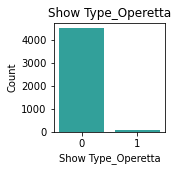

   Show Type_Operetta  Count  Percent
0                   0   4486    98.62
1                   1     63     1.38
_________________________________________________________________


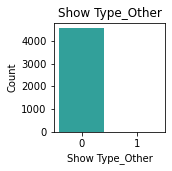

   Show Type_Other  Count  Percent
0                0   4548    99.98
1                1      1     0.02
_________________________________________________________________


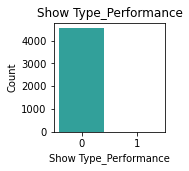

   Show Type_Performance  Count  Percent
0                      0   4541    99.82
1                      1      8     0.18
_________________________________________________________________


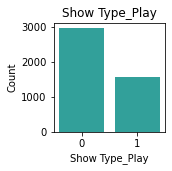

   Show Type_Play  Count  Percent
1               0   2970    65.29
0               1   1579    34.71
_________________________________________________________________


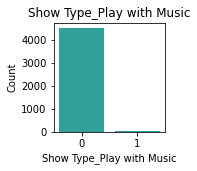

   Show Type_Play with Music  Count  Percent
0                          0   4522    99.41
1                          1     27     0.59
_________________________________________________________________


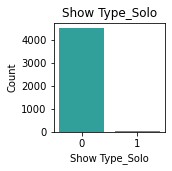

   Show Type_Solo  Count  Percent
0               0   4523    99.43
1               1     26     0.57
_________________________________________________________________


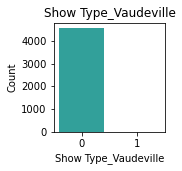

   Show Type_Vaudeville  Count  Percent
0                     0   4548    99.98
1                     1      1     0.02
_________________________________________________________________


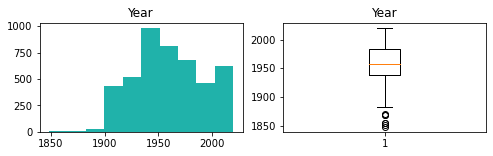

count    4549.000000
mean     1959.872719
std        32.051654
min      1848.000000
25%      1939.000000
50%      1958.000000
75%      1984.000000
max      2020.000000
Name: Year, dtype: float64


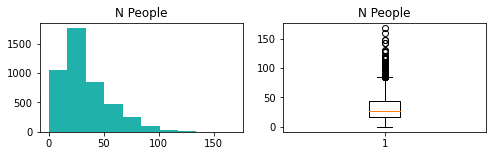

count    4549.000000
mean       32.774016
std        22.172128
min         0.000000
25%        17.000000
50%        27.000000
75%        44.000000
max       168.000000
Name: N People, dtype: float64


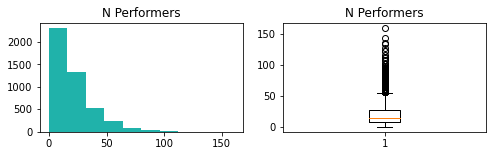

count    4549.000000
mean       20.237635
std        17.717440
min         0.000000
25%         8.000000
50%        15.000000
75%        27.000000
max       160.000000
Name: N Performers, dtype: float64


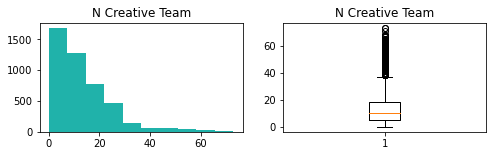

count    4549.000000
mean       13.363596
std        11.264301
min         0.000000
25%         5.000000
50%        10.000000
75%        18.000000
max        73.000000
Name: N Creative Team, dtype: float64


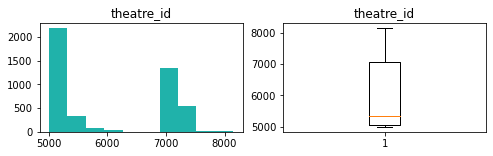

count    4549.000000
mean     6011.958452
std       993.364003
min      5000.000000
25%      5057.000000
50%      5334.000000
75%      7054.000000
max      8150.000000
Name: theatre_id, dtype: float64


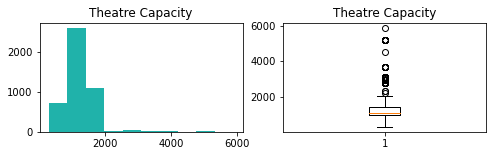

count    4549.000000
mean     1194.935590
std       479.068637
min       299.000000
25%       947.000000
50%      1093.000000
75%      1437.000000
max      5880.000000
Name: Theatre Capacity, dtype: float64


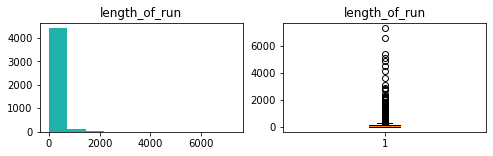

count    4549.000000
mean      135.562102
std       320.674066
min         0.000000
25%        13.000000
50%        51.000000
75%       124.000000
max      7293.000000
Name: length_of_run, dtype: float64


In [9]:
explore.explore_univariate(df, cat_vars, quant_vars)

**Takeaways:**
- Only 1/4 of the shows are revivals
- Production type:Production?
- Revival under production type + is production type...should I drop one?
- Show type performance? only .18? What is that category
- Show type solo - is this duplicated with number of actors?

**Multivariate Analysis**

In [10]:
partitions = prepare.split(df, 'length_of_run')

In [11]:
train = partitions[0]
train.head()

,Year,N People,N Performers,N Creative Team,theatre_id,Theatre Capacity,length_of_run,is_revival,Production Type_Concert,Production Type_Original Production,...,Show Type_Musical,Show Type_One-Acts,Show Type_Opera Bouffe,Show Type_Operetta,Show Type_Other,Show Type_Performance,Show Type_Play,Show Type_Play with Music,Show Type_Solo,Show Type_Vaudeville
show_id,,,,,,,,,,,,,,,,,,,,,
320884,1945,11,8,3,5031.0,1096.0,30,0,0,1,...,0,0,0,0,0,0,1,0,0,0
329875,2011,81,23,59,5132.0,1006.0,52,0,0,1,...,1,0,0,0,0,0,0,0,0,0
311763,1984,23,10,15,5057.0,1009.0,83,0,0,1,...,0,0,0,0,0,0,1,0,0,0
321169,1952,13,7,6,7033.0,922.0,19,0,0,1,...,0,0,0,0,0,0,1,0,0,0
330110,2012,50,27,23,6985.0,1467.0,101,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [12]:
#Separate logerror into quantiles
train['run_class'] = pd.qcut(train.length_of_run, q=5, labels=['q1', 'q2', 'q3', 'q4', 'q5'])

In [13]:
categorical_target = 'run_class'
continuous_target = 'length_of_run'
binary_vars = ['is_revival', 'Production Type_Concert',
       'Production Type_Original Production', 'Production Type_Premiere',
       'Production Type_Production', 'Production Type_Revised Production',
       'Production Type_Revival', 'Show Type_Ballet', 'Show Type_Dance',
       'Show Type_Musical', 'Show Type_One-Acts', 'Show Type_Opera Bouffe',
       'Show Type_Operetta', 'Show Type_Other', 'Show Type_Performance',
       'Show Type_Play', 'Show Type_Play with Music', 'Show Type_Solo',
       'Show Type_Vaudeville']

quant_vars = ['Year','N People', 'N Performers',
       'N Creative Team', 'theatre_id', 'Theatre Capacity', 'length_of_run']

is_revival 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=631584.0, pvalue=0.24334262650803662)
        chi2       p-value  degrees of freedom
0  91.792475  5.478420e-19                   4

expected:
             0           1           2           3           4
0  407.198665  355.645073  380.301139  378.806832  381.048292
1  137.801335  120.354927  128.698861  128.193168  128.951708


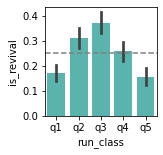


_____________________

Production Type_Concert 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)
   chi2  p-value  degrees of freedom
0   0.0      1.0                   0

expected:
        0      1      2      3      4
0  545.0  476.0  509.0  507.0  510.0


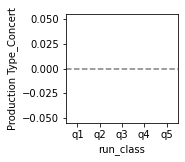


_____________________

Production Type_Original Production 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=661130.5, pvalue=0.9426571938913536)
         chi2       p-value  degrees of freedom
0  118.342631  1.206740e-24                   4

expected:
             0          1           2           3           4
0  154.919513  135.30585  144.686298  144.117786  144.970554
1  390.080487  340.69415  364.313702  362.882214  365.029446


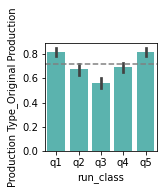


_____________________

Production Type_Premiere 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=53163.5, pvalue=0.0011824802617009386)
        chi2   p-value  degrees of freedom
0  26.557001  0.000024                   4

expected:
             0           1           2          3           4
0  532.803298  465.347468  497.608952  495.65371  498.586572
1   12.196702   10.652532   11.391048   11.34629   11.413428


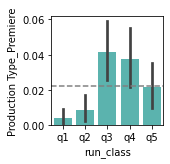


_____________________

Production Type_Production 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=24561.0, pvalue=0.5588596463430558)
        chi2   p-value  degrees of freedom
0  11.766445  0.019175                   4

expected:
             0           1           2           3           4
0  540.506478  472.075383  504.803298  502.819788  505.795053
1    4.493522    3.924617    4.196702    4.180212    4.204947


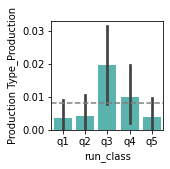


_____________________

Production Type_Revised Production 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=2286.0, pvalue=0.8036038086597812)
       chi2   p-value  degrees of freedom
0  3.016167  0.555123                   4

expected:
             0           1           2           3           4
0  544.572046  475.626227  508.600314  506.601885  509.599529
1    0.427954    0.373773    0.399686    0.398115    0.400471


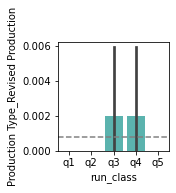


_____________________

Production Type_Revival 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=631584.0, pvalue=0.24334262650803662)
        chi2       p-value  degrees of freedom
0  91.792475  5.478420e-19                   4

expected:
             0           1           2           3           4
0  407.198665  355.645073  380.301139  378.806832  381.048292
1  137.801335  120.354927  128.698861  128.193168  128.951708


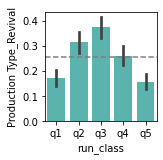


_____________________

Show Type_Ballet 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=759.0, pvalue=0.48487036352299206)
       chi2  p-value  degrees of freedom
0  4.025249   0.4026                   4

expected:
             0           1           2           3           4
0  544.786023  475.813113  508.800157  506.800942  509.799764
1    0.213977    0.186887    0.199843    0.199058    0.200236


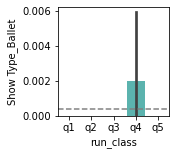


_____________________

Show Type_Dance 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=5294.5, pvalue=0.8874355473634385)
       chi2   p-value  degrees of freedom
0  3.863808  0.424751                   4

expected:
             0           1           2           3           4
0  544.144091  475.252454  508.200628  506.203769  509.199058
1    0.855909    0.747546    0.799372    0.796231    0.800942


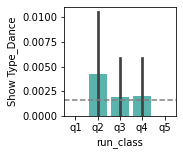


_____________________

Show Type_Musical 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=502074.0, pvalue=3.3166733577870585e-32)
         chi2       p-value  degrees of freedom
0  134.190235  4.943979e-28                   4

expected:
             0           1           2           3           4
0  370.180605  323.313702  345.728308  344.369847  346.407538
1  174.819395  152.686298  163.271692  162.630153  163.592462


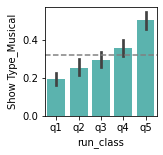


_____________________

Show Type_One-Acts 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)
   chi2  p-value  degrees of freedom
0   0.0      1.0                   0

expected:
        0      1      2      3      4
0  545.0  476.0  509.0  507.0  510.0


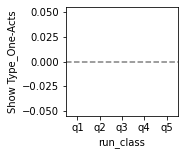


_____________________

Show Type_Opera Bouffe 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)
   chi2  p-value  degrees of freedom
0   0.0      1.0                   0

expected:
        0      1      2      3      4
0  545.0  476.0  509.0  507.0  510.0


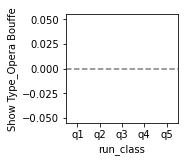


_____________________

Show Type_Operetta 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=53750.0, pvalue=0.6108450767896776)
        chi2   p-value  degrees of freedom
0  20.773051  0.000351                   4

expected:
             0           1           2           3           4
0  536.226934  468.337652  500.806439  498.838634  501.790342
1    8.773066    7.662348    8.193561    8.161366    8.209658


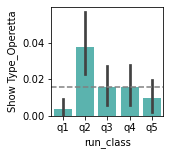


_____________________

Show Type_Other 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=517.5, pvalue=0.3044241425208387)
       chi2  p-value  degrees of freedom
0  4.025249   0.4026                   4

expected:
             0           1           2           3           4
0  544.786023  475.813113  508.800157  506.800942  509.799764
1    0.213977    0.186887    0.199843    0.199058    0.200236


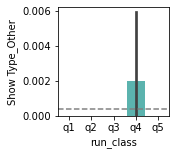


_____________________

Show Type_Performance 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=8987.0, pvalue=0.4484955274081044)
       chi2   p-value  degrees of freedom
0  9.035803  0.060211                   4

expected:
             0           1           2           3           4
0  543.716137  474.878681  507.800942  505.805654  508.798587
1    1.283863    1.121319    1.199058    1.194346    1.201413


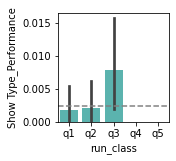


_____________________

Show Type_Play 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=947617.0, pvalue=2.5980961435665455e-31)
         chi2       p-value  degrees of freedom
0  128.997271  6.380147e-27                   4

expected:
             0          1           2           3           4
0  192.579505  168.19788  179.858657  179.151943  180.212014
1  352.420495  307.80212  329.141343  327.848057  329.787986


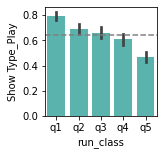


_____________________

Show Type_Play with Music 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=16101.0, pvalue=0.3090160443632708)
       chi2   p-value  degrees of freedom
0  4.699127  0.319585                   4

expected:
             0           1           2           3           4
0  541.790342  473.196702  506.002356  504.014134  506.996466
1    3.209658    2.803298    2.997644    2.985866    3.003534


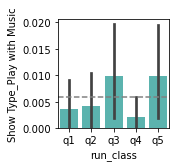


_____________________

Show Type_Solo 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=14899.5, pvalue=0.3021523258864742)
       chi2   p-value  degrees of freedom
0  1.953026  0.744398                   4

expected:
             0           1           2           3           4
0  542.004319  473.383589  506.202199  504.213192  507.196702
1    2.995681    2.616411    2.797801    2.786808    2.803298


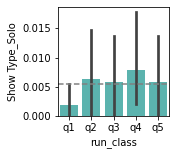


_____________________

Show Type_Vaudeville 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=2477.5, pvalue=0.10147458967944373)
       chi2   p-value  degrees of freedom
0  3.674837  0.451796                   4

expected:
             0           1           2           3           4
0  544.786023  475.813113  508.800157  506.800942  509.799764
1    0.213977    0.186887    0.199843    0.199058    0.200236


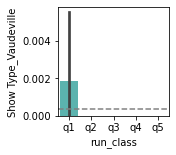


_____________________

Year 
____________________



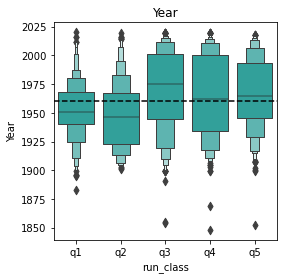

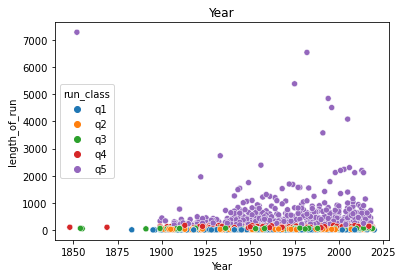

run_class           q1           q2           q3           q4           q5
count       545.000000   476.000000   509.000000   507.000000   510.000000
mean       1952.181651  1948.468487  1969.269155  1963.662722  1967.015686
std          24.401551    28.404838    35.531569    35.860438    30.398140
min        1883.000000  1901.000000  1854.000000  1848.000000  1852.000000
25%        1940.000000  1923.000000  1945.000000  1934.000000  1945.250000
50%        1951.000000  1946.500000  1975.000000  1962.000000  1965.000000
75%        1968.000000  1967.000000  2001.000000  2000.000000  1993.000000
max        2020.000000  2019.000000  2019.000000  2019.000000  2018.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.21883827997714292, pvalue=5.430759727508409e-29)

____________________

N People 
____________________



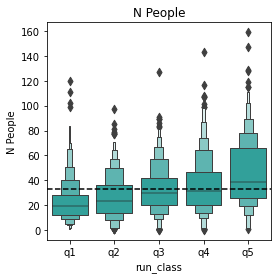

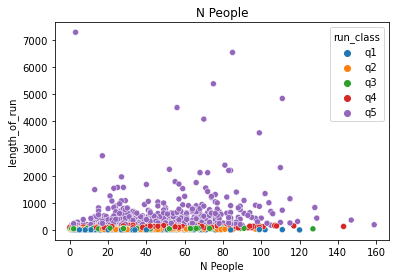

run_class          q1          q2          q3          q4          q5
count      545.000000  476.000000  509.000000  507.000000  510.000000
mean        23.155963   26.588235   32.868369   35.712032   46.021569
std         16.412857   17.710853   19.138234   22.385499   27.318998
min          1.000000    1.000000    0.000000    0.000000    1.000000
25%         12.000000   14.000000   20.000000   20.000000   26.000000
50%         19.000000   23.000000   30.000000   31.000000   39.000000
75%         28.000000   36.000000   42.000000   47.000000   66.000000
max        120.000000   97.000000  127.000000  143.000000  159.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.37671420288652635, pvalue=1.0970943636515481e-86)

____________________

N Performers 
____________________



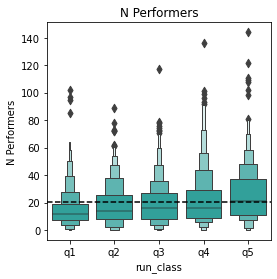

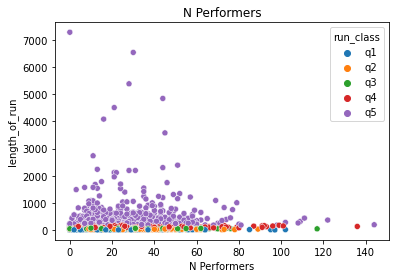

run_class          q1          q2          q3          q4          q5
count      545.000000  476.000000  509.000000  507.000000  510.000000
mean        15.355963   18.434874   19.168959   21.964497   26.129412
std         13.860183   15.592912   16.049473   19.682929   20.426372
min          0.000000    0.000000    0.000000    0.000000    0.000000
25%          7.000000    7.750000    8.000000    9.000000   11.000000
50%         12.000000   14.000000   16.000000   16.000000   21.000000
75%         19.000000   25.250000   27.000000   29.000000   37.000000
max        102.000000   89.000000  117.000000  136.000000  144.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.2204779452458138, pvalue=2.057805157889161e-29)

____________________

N Creative Team 
____________________



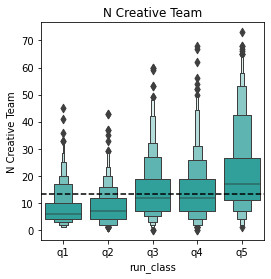

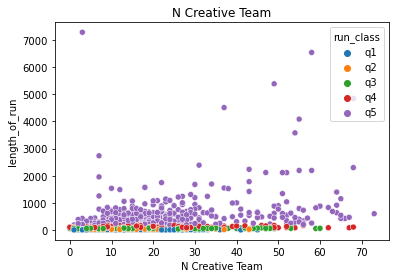

run_class          q1          q2          q3          q4          q5
count      545.000000  476.000000  509.000000  507.000000  510.000000
mean         8.333945    8.760504   14.577603   14.566075   21.166667
std          6.699323    6.751327   10.578929   10.971265   15.249776
min          1.000000    1.000000    0.000000    0.000000    1.000000
25%          4.000000    4.000000    7.000000    7.000000   11.000000
50%          6.000000    7.000000   12.000000   12.000000   17.000000
75%         10.000000   12.000000   19.000000   19.000000   26.750000
max         45.000000   43.000000   60.000000   68.000000   73.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.4355912488472926, pvalue=1.9229935838013332e-118)

____________________

theatre_id 
____________________



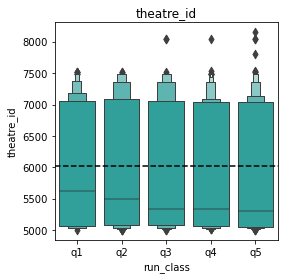

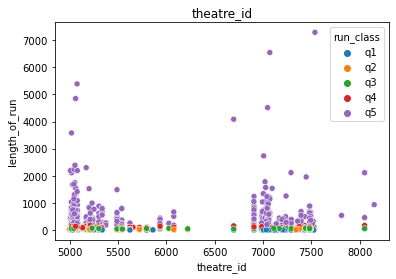

run_class           q1           q2           q3           q4           q5
count       545.000000   476.000000   509.000000   507.000000   510.000000
mean       6104.620183  6056.302521  6071.363458  5953.761341  5910.698039
std         996.817410  1011.294758  1015.178173   956.296120   983.457225
min        5003.000000  5000.000000  5000.000000  5013.000000  5007.000000
25%        5057.000000  5075.000000  5077.000000  5057.000000  5047.000000
50%        5624.000000  5488.000000  5334.000000  5334.000000  5300.000000
75%        7059.000000  7094.000000  7059.000000  7042.000000  7040.000000
max        7524.000000  7524.000000  8051.000000  8051.000000  8150.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.09442683736183036, pvalue=1.8074053537301035e-06)

____________________

Theatre Capacity 
____________________



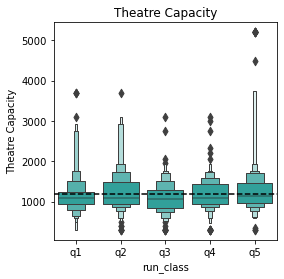

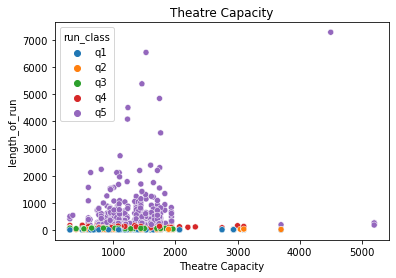

run_class           q1           q2           q3           q4           q5
count       545.000000   476.000000   509.000000   507.000000   510.000000
mean       1153.157798  1278.739496  1088.797642  1174.100592  1285.456863
std         470.125086   530.007324   365.072995   347.687248   596.318194
min         300.000000   300.000000   300.000000   300.000000   299.000000
25%         947.000000   948.000000   840.000000   954.000000   979.750000
50%        1084.000000  1100.000000  1080.000000  1094.000000  1150.000000
75%        1232.000000  1500.000000  1279.000000  1437.000000  1460.000000
max        3700.000000  3700.000000  3100.000000  3100.000000  5200.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.08908439714361448, pvalue=6.711390389008903e-06)

____________________

length_of_run 
____________________



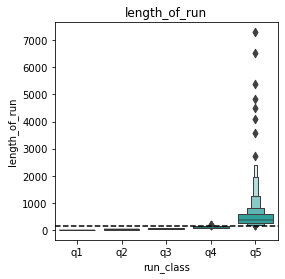

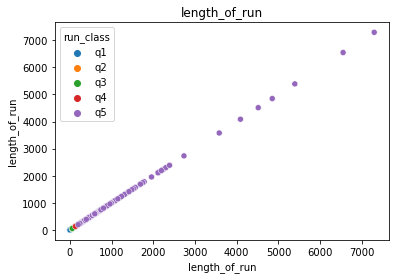

run_class          q1          q2          q3          q4           q5
count      545.000000  476.000000  509.000000  507.000000   510.000000
mean         4.121101   21.781513   52.801572  112.428008   545.441176
std          3.650646    6.772899   11.320923   27.577061   684.081283
min          0.000000   12.000000   34.000000   75.000000   174.000000
25%          0.000000   16.000000   42.000000   89.000000   241.500000
50%          3.000000   21.000000   52.000000  105.000000   358.500000
75%          7.000000   26.000000   61.000000  135.000000   603.500000
max         11.000000   33.000000   74.000000  173.000000  7293.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=1.0, pvalue=0.0)

____________________



In [14]:
explore.explore_bivariate(train, categorical_target, continuous_target, binary_vars, quant_vars)

**Takeaways:**
- is_revival is normally distributed bu run class
- Original productions either flop immediately or do really well it seems visually, but the pvalue is too high
- Premiere is better feature it seems for predicting run length
- Not much for production or revised production
- Ballet in q4 only...how many different ballets are there in this data set?
- Dance is in the middle...no super long runs, but also no super short runs
- Musicals skew towards longer runs...as expected
- Others run longer which is interesting...is it because the category is high risk that producers only take it on when they have reason to believe it will be a huge success?
- Plays have shorter run lengths...again, no  surprise there
- But plays with music do better...may want to make sure I keep those categories disticnt
- Not much said for solo
- Vaudevile is short runs...probably correlated with when the show premiered and run times were shorter?
- Looks like there is a relationship between when a show premiered and how long it runs
- One outlier in year 1850...propbably need to address that in i2
- The number of performers seems to have a relationship with length of run
- Creative team and the number of people on it is definitely correlated
- Looks like some venues are more successful
- Capacity is correlated with success

**Multivariate Exploration**

<AxesSubplot:>

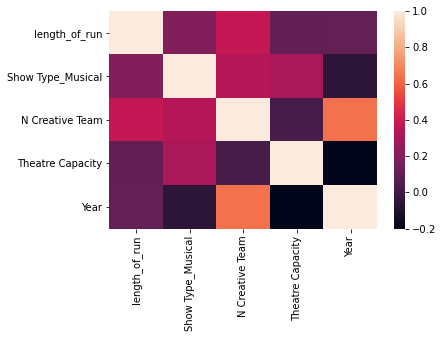

In [15]:
sns.heatmap(train[['length_of_run','Show Type_Musical','N Creative Team','Theatre Capacity','Year']].corr())

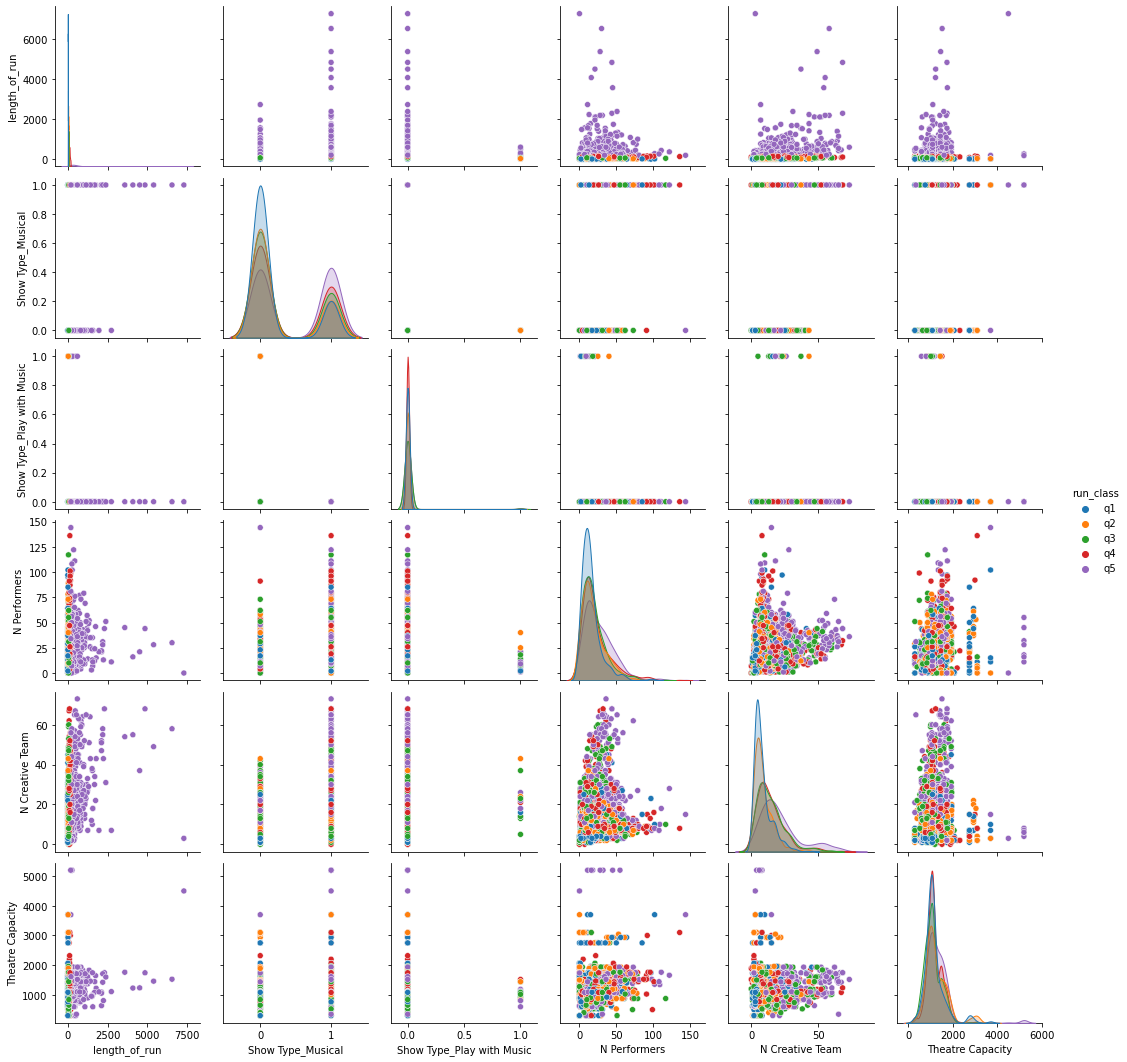

In [16]:
sns.pairplot(train[['length_of_run', 'run_class','Show Type_Musical', 'Show Type_Play with Music',
      'N Performers','N Creative Team','Theatre Capacity']], hue='run_class')

**Takeaways:**<br>
    - Don't see too much here honestly

## Exploration with Clustering

In [17]:
train.columns

Index(['Year', 'N People', 'N Performers', 'N Creative Team', 'theatre_id',
       'Theatre Capacity', 'length_of_run', 'is_revival',
       'Production Type_Concert', 'Production Type_Original Production',
       'Production Type_Premiere', 'Production Type_Production',
       'Production Type_Revised Production', 'Production Type_Revival',
       'Show Type_Ballet', 'Show Type_Dance', 'Show Type_Musical',
       'Show Type_One-Acts', 'Show Type_Opera Bouffe', 'Show Type_Operetta',
       'Show Type_Other', 'Show Type_Performance', 'Show Type_Play',
       'Show Type_Play with Music', 'Show Type_Solo', 'Show Type_Vaudeville',
       'run_class'],
      dtype='object')

In [18]:
# the variables that need scaling
scaled_vars = ['Year', 'N People', 'N Performers',
       'N Creative Team', 'theatre_id', 'Theatre Capacity']

# create new column names for the scaled variables by adding 'scaled_' to the beginning of each variable name 
scaled_column_names = ['scaled_' + i for i in scaled_vars]

# select the X partitions: [X_train, X_validate, X_test]
X = partitions[1:4]

# fit the minmaxscaler to X_train
X_train = X[0]

scaler = MinMaxScaler(copy=True).fit(X_train[scaled_vars])

def scale_and_concat(df):
    scaled_array = scaler.transform(df[scaled_vars])
    scaled_df = pd.DataFrame(scaled_array, columns=scaled_column_names, index=df.index.values)
    return pd.concat((df, scaled_df), axis=1)

for i in range(len(X)):
    X[i] = scale_and_concat(X[i])

In [19]:
#Set X_train to X[0] (Partitions[1] = X_train = X[0])
X_train = X[0]

### Cluster on Year and 'N Creative Team'

In [20]:
# define independent variables for k-means
X = X_train[['Year', 'N Creative Team']]

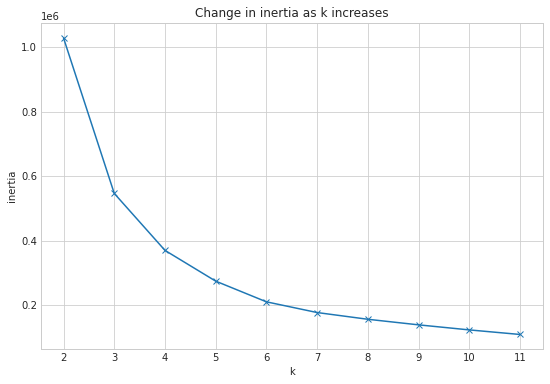

In [21]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

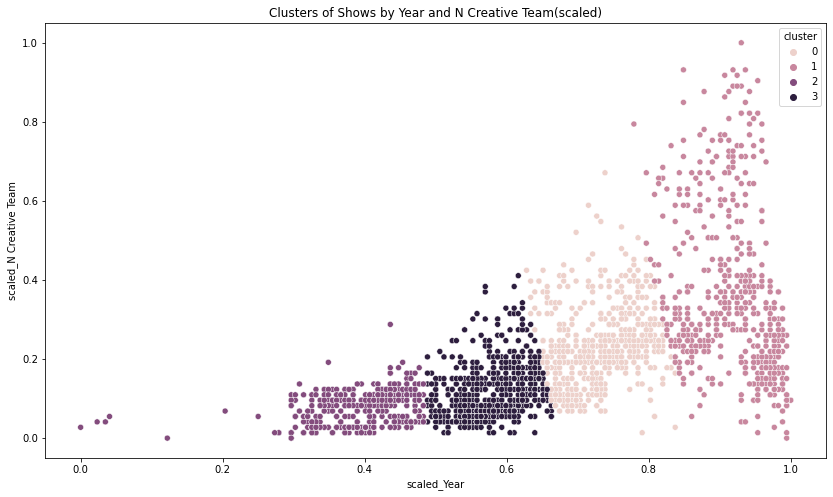

In [22]:
#define the thing
kmeans = KMeans(n_clusters=4)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

# make a new column names cluster in X_train and X[0] dataframe
X_train['cluster'] = kmeans.predict(X)

# Cluster Centers aka centroids - THE OUTPUT IS SCALED 
kmeans.cluster_centers_

# Make a dataframe of the Centroids for visualization
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)

#Plot the clusters and centroids
plt.figure(figsize=(14,8))

sns.scatterplot(x="scaled_Year", y="scaled_N Creative Team", data=X_train, hue='cluster')

# plot cluster centers (centroids)
#centroids_scaled.plot.scatter(x="scaled_Year", y="scaled_N Creative Team", ax=plt.gca(), color='k', alpha = 0.3, s = 200, marker = 'o', label = 'centroids_scaled')

plt.title('Clusters of Shows by Year and N Creative Team(scaled)')
plt.show()

**Takeaways:**
- More modern/contempory shows have > creative team members than less modern shows

In [23]:
X_train.drop(columns={'cluster'}, inplace=True)

## Modeling

In [24]:
#Define the other dataframes from partitions
X_validate = partitions[2]
X_test = partitions[3]
y_train = partitions[4]
y_validate = partitions[5] 
y_test = partitions[6]

**Establish a Baseline Accuracy Model**

In [25]:
# 1. Predict length of run with mean
yhat_baseline = y_train['length_of_run'].mean()
y_train['yhat_baseline_mean'] = yhat_baseline

#2. Predict length of run with median
yhat_baseline = y_train['length_of_run'].median()
y_train['yhat_baseline_median'] = yhat_baseline

#Evaluate the baseline model using the mean
mean_baseline_stats = pd.DataFrame([evaluate.baseline_mean_errors(y_train.length_of_run)])
median_baseline_stats = pd.DataFrame([evaluate.baseline_median_errors(y_train.length_of_run)])

In [26]:
mean_baseline_stats

,sse,mse,rmse
0,3.433513e+08,134806.181809,367.159614


In [27]:
median_baseline_stats

,sse,mse,rmse
0,366386876.0,143850.363565,379.276105


**Takeaways:**
Use the mean for establishing baseline

In [28]:
y_train.drop(columns={'yhat_baseline_median'}, inplace=True)

### Linear Regression

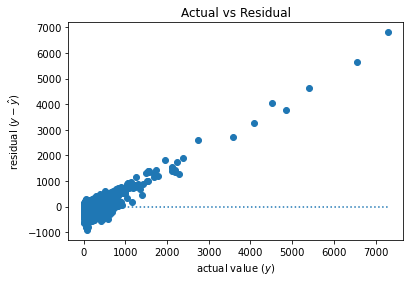

,sse,ess,tss,mse,rmse,r^2
0,277528468.0,6.605948e+07,3.433513e+08,108962.884963,330.095266,0.192396


In [29]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.length_of_run)

# predict train
y_train['yhat_lm'] = lm.predict(X_train)

# compute residuals
y_train['residual'] = y_train['yhat_lm'] - y_train['length_of_run']
y_train['baseline_residual'] = y_train['yhat_baseline_mean'] - y_train['length_of_run']

#Use evaluate model to visualize the residuals
evaluate.plot_residuals(y_train.length_of_run, y_train.yhat_lm)

#Retrieve evaluation metrics for Linear Regression Model on in-sample data
pd.DataFrame(evaluate.regression_errors(y_train.length_of_run, y_train.yhat_lm)).T

In [32]:
# predict train
y_validate['yhat_lm'] = lm.predict(X_validate)

# compute residuals
y_validate['residual'] = y_validate['yhat_lm'] - y_validate['length_of_run']
y_validate['baseline_residual'] = y_validate['yhat_baseline_mean'] - y_validate['length_of_run']

#Use evaluate model to visualize the residuals
evaluate.plot_residuals(y_validate.length_of_run, y_validate.yhat_lm)

#Retrieve evaluation metrics for Linear Regression Model on in-sample data
pd.DataFrame(evaluate.regression_errors(y_validate.length_of_run, y_validate.yhat_lm)).T

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 31 is different from 25)

(1092, 25)

**Takeaways:**<br>
-The Linear regression model performs better than the baseline model<br>
-But the RMSE is 330 and being off by 330 is almost a full year == LOTS of money in Broadway revenue terms.<br>
-Must see if I can build a model that further reduces rmse

**Tweedie Regressor Model**

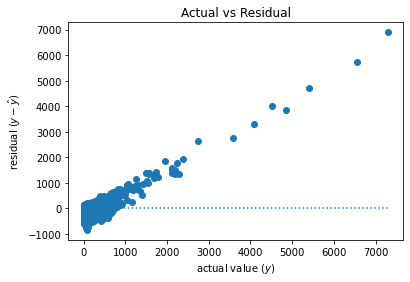

sse     2.825888e+08
ess     6.076859e+07
tss     3.433513e+08
mse     1.109497e+05
rmse    3.330911e+02
r^2     1.769866e-01
dtype: float64

In [31]:
# create the model object
glm = TweedieRegressor(power=0, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.length_of_run)

# predict train
y_train['yhat_glm'] = glm.predict(X_train)

#Use evaluate model to visualize the residuals
evaluate.plot_residuals(y_train.length_of_run, y_train.yhat_glm)

#How does the GLM model perform on in-sample data?
evaluate.regression_errors(y_train.length_of_run, y_train.yhat_glm)